Static data is data at a certain time

### 5. Recurrent Neural Network
Sequential data is the opposite of static data
- more dynamic
- it deals with multiple points in time
- Weather, stock, traffic, video feeds

In [1]:
import numpy as np
import neurolab as nl
import matplotlib.pyplot as plt
%matplotlib inline

# Create a function to define sin waves
def get_data(num_points):
    wave_1 = 0.6 * np.sin(np.arange(0, num_points))
    wave_2 = 3.5 * np.sin(np.arange(0, num_points))
    wave_3 = 1.2 * np.sin(np.arange(0, num_points))
    wave_4 = 4.6 * np.sin(np.arange(0, num_points))

    # Create amplitudes for the overall waves
    amplitude_1 = np.ones(num_points)
    amplitude_2 = 2.2 + np.zeros(num_points)
    amplitude_3 = 3.1 * np.ones(num_points)
    amplitude_4 = 0.9 + np.zeros(num_points)

    # Overall waveform
    wave = np.array([wave_1, wave_2, wave_3, wave_4]).reshape(num_points * 4, 1)
    amplitude = np.array([amplitude_1, amplitude_2, amplitude_3, amplitude_4]).reshape(num_points * 4, 1)

    return wave, amplitude

# view the output of the neural networks
def visualize_output(neural_network, num_points_test):
    wave, amplitude = get_data(num_points_test)
    output = neural_network.sim(wave)

    plt.plot(amplitude.reshape(num_points_test * 4))
    plt.plot(output.reshape(num_points_test * 4))

if __name__ == '__main__':
    num_points = 50
    wave, amplitude = get_data(num_points)

Epoch: 100; Error: 0.7810342063687088;
Epoch: 200; Error: 0.1483308981660938;
Epoch: 300; Error: 0.04779824395394655;
Epoch: 400; Error: 0.04209715932922043;
Epoch: 500; Error: 0.03711919164272493;
Epoch: 600; Error: 0.03612481866129524;
Epoch: 700; Error: 0.036689093729431896;
Epoch: 800; Error: 0.031558762973516154;
Epoch: 900; Error: 0.030345529267294957;
Epoch: 1000; Error: 0.029414371165511027;
Epoch: 1100; Error: 0.02902163014044063;
Epoch: 1200; Error: 0.0287546583560511;
The maximum number of train epochs is reached


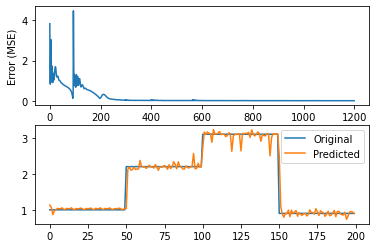

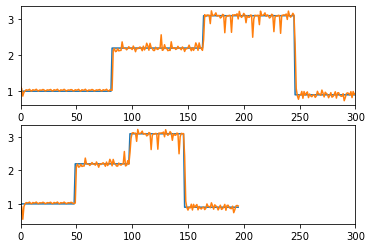

In [2]:
# Elman Recurrent Network = MinMax range of input value, # of neurons for each layer, transfer functions
# MinMax : [-2, 2] ----- # of neurons in 2 layers : [10, 1] ----- # transfer functions :  TanSig() , PureLin()
# TanSig() = Hyperbolic Tangent (or TanH)
# PureLin() = Linear
neural_network = nl.net.newelm([[-2, 2]], [10, 1], [nl.trans.TanSig(), nl.trans.PureLin()])


# Let's set the initializer function for each layer
neural_network.layers[0].initf = nl.init.InitRand([-0.1, 0.1], 'wb')
neural_network.layers[1].initf = nl.init.InitRand([-0.1, 0.1], 'wb')
neural_network.init()

# Now let's train the network
error_progress = neural_network.train(wave, amplitude, epochs=1200, show=100, goal=0.01)

# Then we are going to run the training data through our neural network using the sim method
output = neural_network.sim(wave)


plt.subplot(211)
plt.plot(error_progress)
plt.xlabel('# of Epochs')
plt.ylabel('Error (MSE)') # Mean Squared Error

plt.subplot(212)
plt.plot(amplitude.reshape(num_points * 4))
plt.plot(output.reshape(num_points * 4))
plt.legend(['Original', 'Predicted'])


# Also let's test out how the Recurrent Neural Network performs with unknown data
plt.figure()
plt.subplot(211)
# The 82 denotes the number of points for the get_data function to randomly function to generate
visualize_output(neural_network, 82)
plt.xlim([0, 300])

plt.subplot(212)
visualize_output(neural_network, 49)
plt.xlim([0, 300])
plt.show()


# Plot 1.) We see how the training goes
# Plot 2.) As specified earlier, we ran the trained net on the training data
# Plot 3.) Show how the RNN simulates/predicts on unknown data (Wave of Higher Length)
# Plot 4.) Show how the RNN simulates/predicts on unknown data (Wave of Lower  Length)
